In [44]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [45]:
import warnings
warnings.filterwarnings('ignore')

# Step-1: Data Gathering 

In [46]:
df = pd.read_csv("TelecomCustomerChurn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5515,2892-GESUL,Female,0,Yes,Yes,18,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,309.25,No
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes
2127,8035-BUYVG,Male,0,Yes,No,40,No,No phone service,DSL,Yes,...,Yes,No,No,No,One year,Yes,Electronic check,42.35,1716.45,Yes
6582,9558-IHEZX,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),106.75,7283.25,No
4242,6124-ACRHJ,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.75,19.75,No


In [47]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [48]:
517400/df.shape[0]

73.46301292063042

# Steps-2: Data Preprocessing

First, remove the customerID column because it is useless.

In [49]:
df.drop('customerID',axis='columns',inplace=True) 

In [50]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Upon quick inspection, I see that TotalCharges is an object even though it should be a float. Let's investigate the current state of this column.

In [51]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Ahh... it is string. Lets convert it to numbers

In [52]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [53]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [54]:
df[df.TotalCharges==' '].shape  # getting only with white Space included rows

(11, 20)

In [55]:
df.iloc[488].TotalCharges

' '

    | Remove rows with space in TotalCharges 

In [56]:
df1 = df[df.TotalCharges!=' '] # getting only without white Space included rows
df1.shape  

(7032, 20)

In [57]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [58]:
df1.dtypes.TotalCharges # getting data type of TotalCharges 

dtype('float64')

In [59]:
df1[df1.Churn=='No'].shape # getting Churn=='No' rows

(5163, 20)

In [60]:
df1[df1.Churn=='Yes'] # getting Churn=='Yes' rows

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


# Step-3: Data Visualization

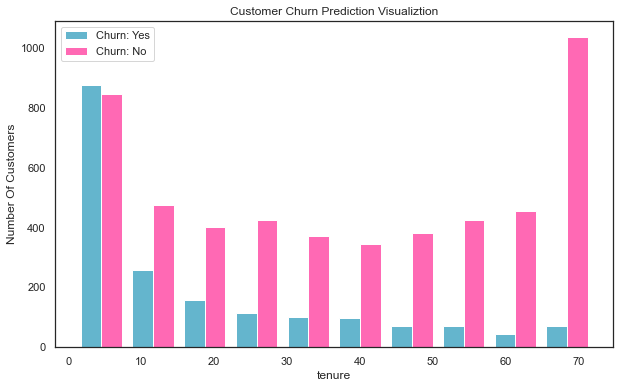

In [61]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.figure(figsize=(10,6))
sns.set(style='white')
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.80, color=['c','hotpink'],label=['Churn: Yes','Churn: No'])
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()

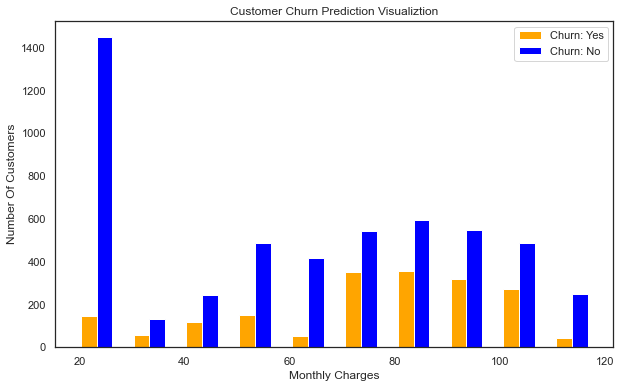

In [62]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      


plt.figure(figsize=(10,6))
sns.set(style='white')
plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.60, color=['orange','blue'],label=['Churn: Yes','Churn: No'])
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.legend()

| Columns are yes, no etc. Let's print unique values in object columns to see data values

In [63]:
def unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [64]:
unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


| Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [65]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [66]:
unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


    | Convert Yes and No to 1 or 0

In [67]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [68]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [69]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [70]:
for column in df1:
    print(f'{column}: {df1[column].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


    | One hot encoding for categorical columns

In [71]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [72]:
df2.shape

(7032, 27)

In [73]:
for column in df2:
    print(f'{column}: {df2[column].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [1 0]
InternetService_Fiber optic: [0 1]
InternetService_No: [0 1]
Contract_Month-to-month: [1 0]
Contract_One year: [0 1]
Contract_Two year: [0 1]
PaymentMethod_Bank transfer (automatic): [0 1]
PaymentMethod_Credit card (automatic): [0 1]
PaymentMethod_Electronic check: [1 0]
PaymentMethod_Mailed check: [0 1]


# Scaling 

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [75]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

# Train test split

In [76]:
X = df2.drop('Churn',axis='columns')
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [77]:
y = testLabels = df2.Churn.astype(np.float32) # astype(np.float32) changes the data types
y.dtypes

dtype('float32')

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


    | Note:

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [80]:
X_train.shape

(5625, 26)

In [81]:
X_test.shape

(1407, 26)

In [82]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

# Steps4: Build a model (ANN) in tensorflow/keras

In [86]:
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras

    | Note: 
TensorFlow Addons is a repository of contributions that conform to well- established API patterns, but implement new functionality not available in core TensorFlow. TensorFlow natively supports a large number of operators, layers, metrics, losses, and optimizers. However, in a fast moving field like ML, there are many interesting new developments that cannot be integrated into core TensorFlow (because their broad applicability is not yet clear, or it is mostly used by a smaller subset of the community).

In [87]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

        
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [88]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 2s 5ms/step - loss: 0.4848 - accuracy: 0.7511
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4347 - accuracy: 0.7844
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4283 - accuracy: 0.7924
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4224 - accuracy: 0.7968
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4199 - accuracy: 0.7991
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4150 - accuracy: 0.8043
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4142 - accuracy: 0.8076
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4119 - accuracy: 0.8076
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4092 - accuracy: 0.8064
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4079 - accura

# Step-5: Mitigating Skewdness of Data

    | Method 1: Undersampling
reference: https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook

In [97]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [101]:
df_class_0.shape

(5163, 27)

In [99]:
df_class_1.shape()

(1869, 27)

In [103]:
df_class_0_under=df_class_0.sample(count_class_1) # here under sampling  df_class_0

| Note: Now df_class_0 & df_class_1 both are equal

In [105]:
df_class_0_under.shape, df_class_1.shape

((1869, 27), (1869, 27))

    | both dataset Concatenation 

In [108]:
df_test_under=pd.concat([df_class_0_under, df_class_1],axis=0)
df_test_under.shape

(3738, 27)

In [111]:
print('Random under sapling')
print(df_test_under.Churn.value_counts())

Random under sapling
0    1869
1    1869
Name: Churn, dtype: int64


In [119]:
df_test_under.shape

(3738, 27)

# Train Test split

In [124]:
x=df_test_under.drop('Churn',axis='columns')
x.shape

(3738, 26)

In [123]:
y=df_test_under.Churn
y.shape

(3738,)

In [127]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2,random_state=2, stratify=y)

In [129]:
xtrain.shape

(2990, 26)

In [130]:
xtest.shape

(748, 26)

In [131]:
ytrain.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [132]:
y_preds = ANN(xtrain, ytrain, xtest, ytest, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 5ms/step - loss: 0.6065 - accuracy: 0.6873
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5188 - accuracy: 0.7441
Epoch 3/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4992 - accuracy: 0.7555
Epoch 4/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4931 - accuracy: 0.7582
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4886 - accuracy: 0.7555
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4869 - accuracy: 0.7615
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4822 - accuracy: 0.7629
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4802 - accuracy: 0.7612
Epoch 9/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4779 - accuracy: 0.7642
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4760 - accuracy: 0.7682
Epoch 11/

In [85]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object